## [은행파산 위기 데이터 분석] 
 * 개인의 파산을 예측하는 대회
 * 데이터 출처 : https://www.kaggle.com/competitions/bankruptcy-risk-prediction
 
 * 데이터 분석 코드
   * [github 코드](https://github.com/LDJWJ/dataAnalysis/blob/main/01_03_Bankruptcy_Risk_Prediction02.ipynb)
   * [HTML코드](https://ldjwj.github.io/dataAnalysis/01_03_Bankruptcy_Risk_Prediction02.html)

### 대회 개요
 * 대회 측정 지표 : ROC~AUC
 * 예측 : proba - true label 예측 확률
 * 데이터 셋 
   * test.csv
   * train.csv
   * submission_example.csv

### 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 데이터 불러오기

In [2]:
sub = pd.read_csv("./data/Bankruptcy/submission_example.csv")
train = pd.read_csv("./data/Bankruptcy/train.csv")
test = pd.read_csv("./data/Bankruptcy/test.csv")

train.shape, test.shape, sub.shape

((800, 22), (200, 21), (200, 2))

In [3]:
train.columns

Index(['id', 'sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status', 'bankruptcy'],
      dtype='object')

In [4]:
test.columns

Index(['id', 'sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status'],
      dtype='object')

* bankruptcy의 컬럼의 값을 예측하는 과제

In [5]:
train['bankruptcy'].unique()

array([0, 1], dtype=int64)

In [6]:
train['bankruptcy'].value_counts()

0    561
1    239
Name: bankruptcy, dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               800 non-null    int64 
 1   sum              800 non-null    int64 
 2   term             800 non-null    int64 
 3   payment          800 non-null    int64 
 4   guarantees       800 non-null    object
 5   reason           800 non-null    object
 6   credits          800 non-null    int64 
 7   other_credits    800 non-null    object
 8   credit_report    800 non-null    object
 9   marital_status   800 non-null    object
 10  age              800 non-null    int64 
 11  employment       800 non-null    object
 12  qualification    800 non-null    object
 13  immigrant        800 non-null    object
 14  residence_since  800 non-null    int64 
 15  accommodation    800 non-null    object
 16  estate           800 non-null    object
 17  savings          800 non-null    ob

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               200 non-null    int64 
 1   sum              200 non-null    int64 
 2   term             200 non-null    int64 
 3   payment          200 non-null    int64 
 4   guarantees       200 non-null    object
 5   reason           200 non-null    object
 6   credits          200 non-null    int64 
 7   other_credits    200 non-null    object
 8   credit_report    200 non-null    object
 9   marital_status   200 non-null    object
 10  age              200 non-null    int64 
 11  employment       200 non-null    object
 12  qualification    200 non-null    object
 13  immigrant        200 non-null    object
 14  residence_since  200 non-null    int64 
 15  accommodation    200 non-null    object
 16  estate           200 non-null    object
 17  savings          200 non-null    ob

* 결측치 없음.

### 데이터 나누기

In [9]:
train.head()

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,...,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
0,0,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not...,male single,...,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
1,1,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,...,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
2,2,2096,12,2,none,education,1,none,critical account or other credits existing(not...,male single,...,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
3,3,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,...,skilled employee,yes,4,for free,building society savings agreement or life ins...,less-than 100 cu,2,none,less-than 0 cu,0
4,4,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,...,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1


In [10]:
# 중간에 생략되는 행과 열을 보이도록 하는 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [11]:
train.head()

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,age,employment,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
0,0,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not...,male single,67,7+ y.,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
1,1,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,22,1 to 4 y.,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
2,2,2096,12,2,none,education,1,none,critical account or other credits existing(not...,male single,49,4 to 7 y.,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
3,3,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,45,4 to 7 y.,skilled employee,yes,4,for free,building society savings agreement or life ins...,less-than 100 cu,2,none,less-than 0 cu,0
4,4,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,53,1 to 4 y.,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1


<AxesSubplot:xlabel='payment', ylabel='count'>

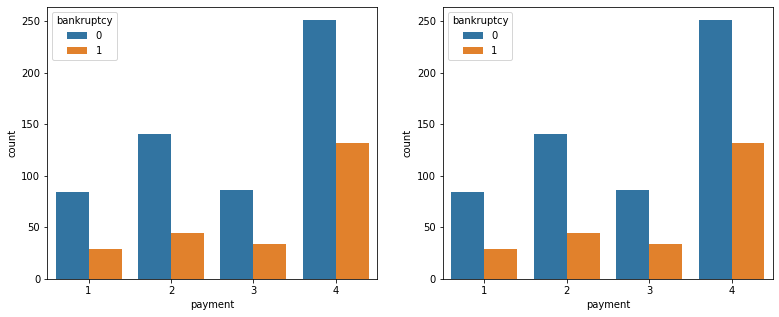

In [12]:
plt.figure(figsize=(13,5) )
plt.subplot(1,2,1)
sns.countplot(x="payment", hue='bankruptcy',  data=train)

plt.subplot(1,2,2)
sns.countplot(x="payment", hue='bankruptcy',  data=train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'television or radio'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture or equipment'),
  Text(3, 0, 'new car'),
  Text(4, 0, 'used car'),
  Text(5, 0, 'business'),
  Text(6, 0, 'household appliances'),
  Text(7, 0, 'repairs'),
  Text(8, 0, 'other'),
  Text(9, 0, 'requalification')])

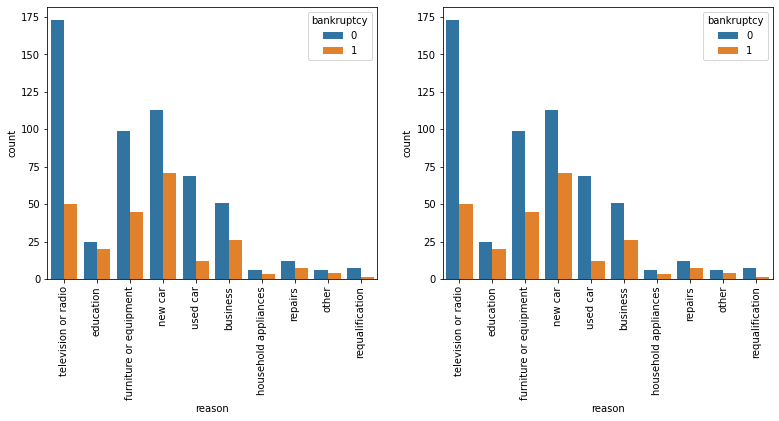

In [13]:
plt.figure(figsize=(13,5) )
plt.subplot(1,2,1)
sns.countplot(x="reason", hue="bankruptcy",  data=train)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x="reason", hue="bankruptcy", data=train)
plt.xticks(rotation=90)

In [14]:
train.reason.value_counts()

television or radio       223
new car                   184
furniture or equipment    144
used car                   81
business                   77
education                  45
repairs                    19
other                      10
household appliances        9
requalification             8
Name: reason, dtype: int64

<AxesSubplot:xlabel='other_credits', ylabel='count'>

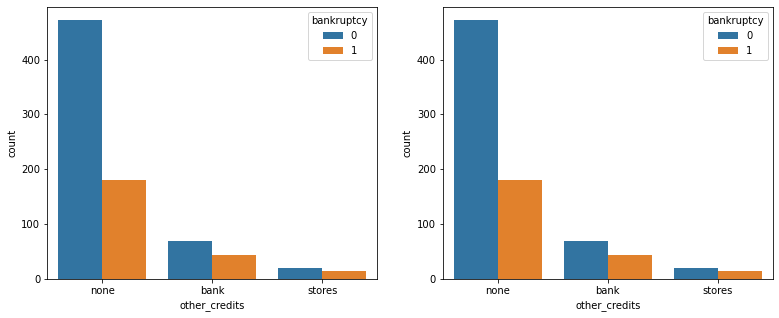

In [15]:
plt.figure(figsize=(13,5) )
plt.subplot(1,2,1)
sns.countplot(x="other_credits", hue="bankruptcy",  data=train)


plt.subplot(1,2,2)
sns.countplot(x="other_credits", hue="bankruptcy", data=train)


<AxesSubplot:xlabel='immigrant', ylabel='count'>

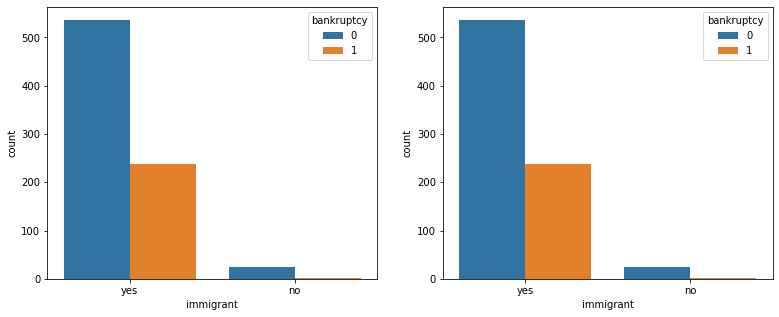

In [16]:
plt.figure(figsize=(13,5) )
plt.subplot(1,2,1)
sns.countplot(x="immigrant", hue="bankruptcy",  data=train)


plt.subplot(1,2,2)
sns.countplot(x="immigrant", hue="bankruptcy", data=train)

<AxesSubplot:xlabel='accommodation', ylabel='count'>

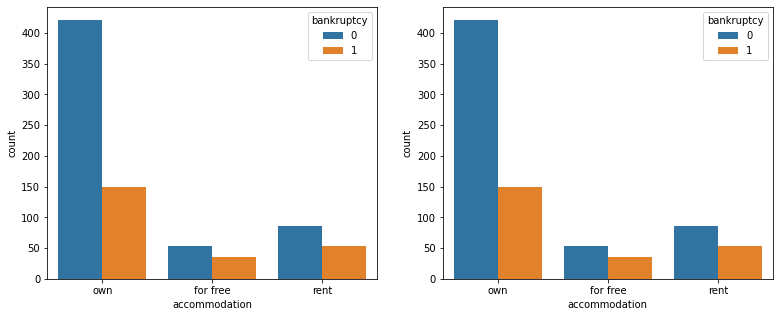

In [17]:
plt.figure(figsize=(13,5) )
plt.subplot(1,2,1)
sns.countplot(x="accommodation", hue="bankruptcy",  data=train)


plt.subplot(1,2,2)
sns.countplot(x="accommodation", hue="bankruptcy", data=train)

<AxesSubplot:xlabel='phone', ylabel='count'>

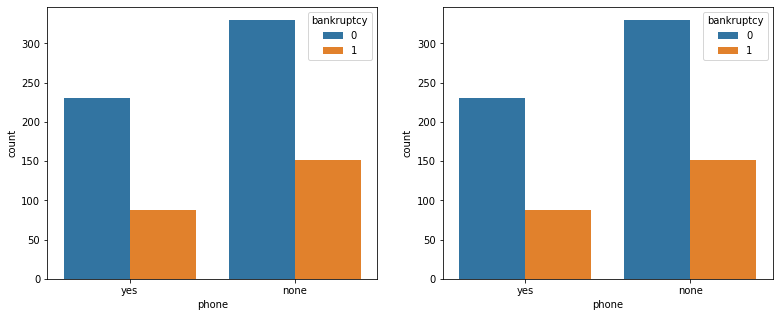

In [18]:
plt.figure(figsize=(13,5) )
plt.subplot(1,2,1)
sns.countplot(x="phone", hue="bankruptcy",  data=train)


plt.subplot(1,2,2)
sns.countplot(x="phone", hue="bankruptcy", data=train)

In [19]:
train.columns

Index(['id', 'sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status', 'bankruptcy'],
      dtype='object')

In [20]:
train.head()

,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,age,employment,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
0,0,1169,6,4,none,television or radio,2,none,critical account or other credits existing(not...,male single,67,7+ y.,skilled employee,yes,4,own,real estate,unknown or no savings account,1,yes,less-than 0 cu,0
1,1,5951,48,2,none,television or radio,1,none,existing credits paid back duly till now,female divorced or separated or married,22,1 to 4 y.,skilled employee,yes,2,own,real estate,less-than 100 cu,1,none,0 to 200 cu,1
2,2,2096,12,2,none,education,1,none,critical account or other credits existing(not...,male single,49,4 to 7 y.,unskilled resident,yes,3,own,real estate,less-than 100 cu,2,none,no checking account,0
3,3,7882,42,2,guarantor,furniture or equipment,1,none,existing credits paid back duly till now,male single,45,4 to 7 y.,skilled employee,yes,4,for free,building society savings agreement or life ins...,less-than 100 cu,2,none,less-than 0 cu,0
4,4,4870,24,3,none,new car,2,none,delay in paying off in the past,male single,53,1 to 4 y.,skilled employee,yes,4,for free,unknown or no property,less-than 100 cu,2,none,less-than 0 cu,1


### 데이터 전처리

In [21]:
print( train.guarantees.unique() )
print( train.reason.unique()  )
print( train.other_credits.unique()  )
print( train.marital_status.unique()  )
print( train.qualification.unique()  )
print( train.immigrant.unique()  )
print( train.accommodation.unique()  )
print( train.estate.unique()  )
print( train.phone.unique()  )

['none' 'guarantor' 'co-applicant']
['television or radio' 'education' 'furniture or equipment' 'new car'
 'used car' 'business' 'household appliances' 'repairs' 'other'
 'requalification']
['none' 'bank' 'stores']
['male single' 'female divorced or separated or married'
 'male divorced or separated' 'male married or widowed']
['skilled employee' 'unskilled resident'
 'management or self-employed or highly qualified employee'
 'unemployed or unskilled non-resident']
['yes' 'no']
['own' 'for free' 'rent']
['real estate' 'building society savings agreement or life insurance'
 'unknown or no property' 'car or other']
['yes' 'none']


In [22]:
### 데이터 전처리
sub = pd.read_csv("./data/Bankruptcy/submission_example.csv")
train = pd.read_csv("./data/Bankruptcy/train.csv")
test = pd.read_csv("./data/Bankruptcy/test.csv")

train.shape, test.shape, sub.shape

((800, 22), (200, 21), (200, 2))

In [23]:
### 전체 컬럼 unique() 확인하기
### 범주형 - 범주가 50개 이하만 출력하기
def columns_print(dataset):
    for one in dataset.columns:
        # print(one)
        col_length = len( dataset[one].unique() )
        if col_length <= 50:
            print("colname : ", one)
            print(dataset[one].unique())
        
columns_print(train)

colname :  term
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
colname :  payment
[4 2 3 1]
colname :  guarantees
['none' 'guarantor' 'co-applicant']
colname :  reason
['television or radio' 'education' 'furniture or equipment' 'new car'
 'used car' 'business' 'household appliances' 'repairs' 'other'
 'requalification']
colname :  credits
[2 1 3 4]
colname :  other_credits
['none' 'bank' 'stores']
colname :  credit_report
['critical account or other credits existing(not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past' 'no credits or all paid'
 'all credits at this bank paid back duly']
colname :  marital_status
['male single' 'female divorced or separated or married'
 'male divorced or separated' 'male married or widowed']
colname :  employment
['7+ y.' '1 to 4 y.' '4 to 7 y.' 'unemployed' 'less-than 1 y.']
colname :  qualification
['skilled employee' 'unskilled resident'
 'management or

In [24]:
### 인코딩 map 내용 만들기

def map_con(dataset, col_names):
    dict_map = {}
    cnt = 0
    unique_value = dataset[col_names].unique()
    print( unique_value )
    
    for one in unique_value:
        # print(one)
        dict_map[one] = cnt
        cnt += 1
    # print(dict_map)
    return dict_map
    
map_con(train, "reason")

['television or radio' 'education' 'furniture or equipment' 'new car'
 'used car' 'business' 'household appliances' 'repairs' 'other'
 'requalification']


{'television or radio': 0,
 'education': 1,
 'furniture or equipment': 2,
 'new car': 3,
 'used car': 4,
 'business': 5,
 'household appliances': 6,
 'repairs': 7,
 'other': 8,
 'requalification': 9}

In [25]:
columns_print(train)

colname :  term
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
colname :  payment
[4 2 3 1]
colname :  guarantees
['none' 'guarantor' 'co-applicant']
colname :  reason
['television or radio' 'education' 'furniture or equipment' 'new car'
 'used car' 'business' 'household appliances' 'repairs' 'other'
 'requalification']
colname :  credits
[2 1 3 4]
colname :  other_credits
['none' 'bank' 'stores']
colname :  credit_report
['critical account or other credits existing(not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past' 'no credits or all paid'
 'all credits at this bank paid back duly']
colname :  marital_status
['male single' 'female divorced or separated or married'
 'male divorced or separated' 'male married or widowed']
colname :  employment
['7+ y.' '1 to 4 y.' '4 to 7 y.' 'unemployed' 'less-than 1 y.']
colname :  qualification
['skilled employee' 'unskilled resident'
 'management or

In [26]:
train['guarantees'] = train.guarantees.map( {'none':0, 'guarantor':1, 'co-applicant':2} )
train.guarantees.unique()

array([0, 1, 2], dtype=int64)

In [27]:
print(train.reason.unique())
reason_dict = map_con(train, "reason")
print(reason_dict)
train['reason'] = train.reason.map( {'television or radio': 0, 'education': 1, 'furniture or equipment': 2, 
                        'new car': 3, 'used car': 4, 'business': 5, 'household appliances': 6, 
                        'repairs': 7, 'other': 8, 'requalification': 9} )
train.reason.unique()

['television or radio' 'education' 'furniture or equipment' 'new car'
 'used car' 'business' 'household appliances' 'repairs' 'other'
 'requalification']
['television or radio' 'education' 'furniture or equipment' 'new car'
 'used car' 'business' 'household appliances' 'repairs' 'other'
 'requalification']
{'television or radio': 0, 'education': 1, 'furniture or equipment': 2, 'new car': 3, 'used car': 4, 'business': 5, 'household appliances': 6, 'repairs': 7, 'other': 8, 'requalification': 9}


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [28]:
#print(train['other_credits'].unique())
dat_dict = map_con(train, "other_credits")
#print(reason_dict)
train['other_credits'] = train['other_credits'].map( dat_dict )
train['other_credits'].unique()

['none' 'bank' 'stores']


array([0, 1, 2], dtype=int64)

### test 데이터 셋 변환
 * guarantees, reason, other_credits

In [29]:
test['guarantees'] = test.guarantees.map( {'none':0, 'guarantor':1, 'co-applicant':2} )
test.guarantees.unique()

reason_dict = map_con(test, "reason")
print(reason_dict)
test['reason'] = test.reason.map( reason_dict )
test.reason.unique()

['education' 'television or radio' 'furniture or equipment' 'new car'
 'used car' 'business' 'household appliances' 'other' 'repairs'
 'requalification']
{'education': 0, 'television or radio': 1, 'furniture or equipment': 2, 'new car': 3, 'used car': 4, 'business': 5, 'household appliances': 6, 'other': 7, 'repairs': 8, 'requalification': 9}


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [30]:
dat_dict = map_con(test, "other_credits")
#print(reason_dict)
test['other_credits'] = test['other_credits'].map( dat_dict )
test['other_credits'].unique()

['none' 'bank' 'stores']


array([0, 1, 2], dtype=int64)

In [31]:
#  employment, qualification, immigrant, accommodation, savings, phone

In [32]:
dat_dict = map_con(train, "credit_report")
train['credit_report'] = train['credit_report'].map( dat_dict )
train['credit_report'].unique()

dat_dict = map_con(train, "marital_status")
train['marital_status'] = train['marital_status'].map( dat_dict )
train['marital_status'].unique()

dat_dict = map_con(train, "employment")
train['employment'] = train['employment'].map( dat_dict )

dat_dict = map_con(train, "qualification")
train['qualification'] = train['qualification'].map( dat_dict )

dat_dict = map_con(train, "immigrant")
train['immigrant'] = train['immigrant'].map( dat_dict )

dat_dict = map_con(train, "accommodation")
train['accommodation'] = train['accommodation'].map( dat_dict )

dat_dict = map_con(train, "savings")
train['savings'] = train['savings'].map( dat_dict )

dat_dict = map_con(train, "phone")
train['phone'] = train['phone'].map( dat_dict )

dat_dict = map_con(train, "estate")
train['estate'] = train['estate'].map( dat_dict )

dat_dict = map_con(train, "credit_report")
train['credit_report'] = train['credit_report'].map( dat_dict )

dat_dict = map_con(train, "status")
train['status'] = train['status'].map( dat_dict )

train.head()

['critical account or other credits existing(not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past' 'no credits or all paid'
 'all credits at this bank paid back duly']
['male single' 'female divorced or separated or married'
 'male divorced or separated' 'male married or widowed']
['7+ y.' '1 to 4 y.' '4 to 7 y.' 'unemployed' 'less-than 1 y.']
['skilled employee' 'unskilled resident'
 'management or self-employed or highly qualified employee'
 'unemployed or unskilled non-resident']
['yes' 'no']
['own' 'for free' 'rent']
['unknown or no savings account' 'less-than 100 cu' '500 to 1000 cu'
 'greater-than 1000 cu' '100 to 500 cu']
['yes' 'none']
['real estate' 'building society savings agreement or life insurance'
 'unknown or no property' 'car or other']
[0 1 2 3 4]
['less-than 0 cu' '0 to 200 cu' 'no checking account'
 'greater-than 200 cu or salary assignments for at least 1 year']


,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,age,employment,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status,bankruptcy
0,0,1169,6,4,0,0,2,0,0,0,67,0,0,0,4,0,0,0,1,0,0,0
1,1,5951,48,2,0,0,1,0,1,1,22,1,0,0,2,0,0,1,1,1,1,1
2,2,2096,12,2,0,1,1,0,0,0,49,2,1,0,3,0,0,1,2,1,2,0
3,3,7882,42,2,1,2,1,0,1,0,45,2,0,0,4,1,1,1,2,1,0,0
4,4,4870,24,3,0,3,2,0,2,0,53,1,0,0,4,1,2,1,2,1,0,1


In [33]:
dat_dict = map_con(test, "credit_report")
test['credit_report'] = test['credit_report'].map( dat_dict )
test['credit_report'].unique()

dat_dict = map_con(test, "marital_status")
test['marital_status'] = test['marital_status'].map( dat_dict )
test['marital_status'].unique()

dat_dict = map_con(test, "employment")
test['employment'] = test['employment'].map( dat_dict )

dat_dict = map_con(test, "qualification")
test['qualification'] = test['qualification'].map( dat_dict )

dat_dict = map_con(test, "immigrant")
test['immigrant'] = test['immigrant'].map( dat_dict )

dat_dict = map_con(test, "accommodation")
test['accommodation'] = test['accommodation'].map( dat_dict )

dat_dict = map_con(test, "savings")
test['savings'] = test['savings'].map( dat_dict )

dat_dict = map_con(test, "phone")
test['phone'] = test['phone'].map( dat_dict )

dat_dict = map_con(test, "estate")
test['estate'] = test['estate'].map( dat_dict )

dat_dict = map_con(test, "credit_report")
test['credit_report'] = test['credit_report'].map( dat_dict )

dat_dict = map_con(test, "status")
test['status'] = test['status'].map( dat_dict )

test.head()

['critical account or other credits existing(not at this bank)'
 'existing credits paid back duly till now'
 'all credits at this bank paid back duly' 'no credits or all paid'
 'delay in paying off in the past']
['male single' 'female divorced or separated or married'
 'male married or widowed' 'male divorced or separated']
['7+ y.' 'unemployed' '4 to 7 y.' 'less-than 1 y.' '1 to 4 y.']
['skilled employee' 'unskilled resident'
 'unemployed or unskilled non-resident'
 'management or self-employed or highly qualified employee']
['yes' 'no']
['for free' 'rent' 'own']
['less-than 100 cu' 'unknown or no savings account' '500 to 1000 cu'
 '100 to 500 cu' 'greater-than 1000 cu']
['none' 'yes']
['unknown or no property' 'real estate'
 'building society savings agreement or life insurance' 'car or other']
[0 1 2 3 4]
['no checking account' '0 to 200 cu' 'less-than 0 cu'
 'greater-than 200 cu or salary assignments for at least 1 year']


,id,sum,term,payment,guarantees,reason,credits,other_credits,credit_report,marital_status,age,employment,qualification,immigrant,residence_since,accommodation,estate,savings,dependents,phone,status
0,800,1597,24,4,0,0,2,0,0,0,54,0,0,0,4,0,0,0,2,0,0
1,801,1795,18,3,1,1,2,1,0,1,48,0,1,0,4,1,1,0,1,1,1
2,802,4272,20,1,0,2,2,0,0,1,24,0,0,0,4,2,2,0,1,0,2
3,803,976,12,4,0,1,2,0,0,0,35,0,0,0,4,2,3,1,1,0,0
4,804,7472,12,1,0,3,1,0,1,1,24,1,2,0,2,1,1,1,1,0,1


In [34]:
train.columns

Index(['id', 'sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status', 'bankruptcy'],
      dtype='object')

<AxesSubplot:>

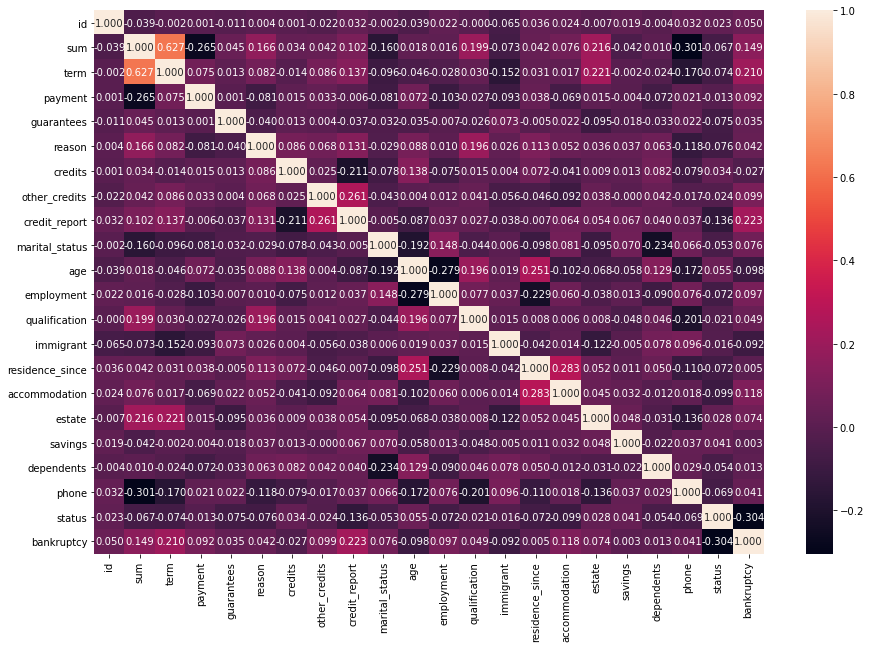

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, fmt=".3f")

In [36]:
#  변경2 : 0.05 이하 제외 'guarantees', 'credits', 'qualification', 'residence_since', 'savings', 'dependents', 'phone',
sel = ['sum', 'term', 'payment', 'reason', 'other_credits', 'credit_report', 
       'marital_status', 'age', 'employment', 'immigrant',  'accommodation',
       'estate', 'status']

X = train[sel]
y = train['bankruptcy']

last_test = test[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state = 0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### 모델 구축 및 학습, 평가

In [38]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

model3 = RandomForestClassifier(max_depth=5, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model3.score(X_train,y_train) )
print("테스트용 정확도 : ", model3.score(X_test,y_test) )

model4 = xgb.XGBClassifier(colsample_bytree = 0.2, # 각나무마다 사용하는 feature 비율
                           learning_rate = 0.05,
                           max_depth = 3, 
                           alpha = 0.1, 
                           n_estimators = 1000)

model4.fit(X_train, y_train)
print("학습용 정확도 : ", model4.score(X_train,y_train) )
print("테스트용 정확도 : ", model4.score(X_test,y_test) )

학습용 정확도 :  0.75
테스트용 정확도 :  0.6666666666666666
학습용 정확도 :  0.7732142857142857
테스트용 정확도 :  0.7083333333333334
학습용 정확도 :  0.8285714285714286
테스트용 정확도 :  0.725
학습용 정확도 :  0.9410714285714286
테스트용 정확도 :  0.7333333333333333


In [39]:
model3 = RandomForestClassifier(max_depth=5, random_state=0)
model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [40]:
model4 = xgb.XGBClassifier(colsample_bytree = 0.2, # 각나무마다 사용하는 feature 비율
                           learning_rate = 0.05,
                           max_depth = 3, 
                           alpha = 0.1, 
                           n_estimators = 1000)
model4.fit(X_train, y_train)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.100000001, ...)

In [41]:
### 예측을 할때, 확률로 예측해야 한다면 predict_proba() 함수 이용

In [42]:
y_pred=model4.predict_proba(last_test)
y_pred

array([[0.7738147 , 0.22618529],
       [0.5721255 , 0.4278745 ],
       [0.8563116 , 0.14368838],
       [0.43256742, 0.5674326 ],
       [0.6292564 , 0.37074357],
       [0.87356377, 0.12643625],
       [0.8078273 , 0.19217269],
       [0.58484614, 0.4151539 ],
       [0.7797332 , 0.22026682],
       [0.4490583 , 0.5509417 ],
       [0.29322988, 0.7067701 ],
       [0.6590963 , 0.3409037 ],
       [0.98275757, 0.01724241],
       [0.42084742, 0.5791526 ],
       [0.9629803 , 0.03701972],
       [0.06089091, 0.9391091 ],
       [0.6516496 , 0.34835038],
       [0.92705125, 0.07294874],
       [0.23359054, 0.76640946],
       [0.5877782 , 0.41222176],
       [0.21029955, 0.78970045],
       [0.67780125, 0.32219872],
       [0.6415738 , 0.35842618],
       [0.896498  , 0.10350196],
       [0.5353322 , 0.46466777],
       [0.44128025, 0.55871975],
       [0.8569337 , 0.14306632],
       [0.42759627, 0.5724037 ],
       [0.98165923, 0.01834076],
       [0.18938005, 0.81061995],
       [0.

In [43]:
y_pred[:, 1]  # 행별 (0일 확률, 1일 확률) 값이 나옴. 이중에 두번째 것을 가져와 제출

array([0.22618529, 0.4278745 , 0.14368838, 0.5674326 , 0.37074357,
       0.12643625, 0.19217269, 0.4151539 , 0.22026682, 0.5509417 ,
       0.7067701 , 0.3409037 , 0.01724241, 0.5791526 , 0.03701972,
       0.9391091 , 0.34835038, 0.07294874, 0.76640946, 0.41222176,
       0.78970045, 0.32219872, 0.35842618, 0.10350196, 0.46466777,
       0.55871975, 0.14306632, 0.5724037 , 0.01834076, 0.81061995,
       0.8711202 , 0.6583212 , 0.7067725 , 0.42848122, 0.04281546,
       0.6744073 , 0.9617891 , 0.11313257, 0.00252658, 0.6923223 ,
       0.2395262 , 0.780959  , 0.44861898, 0.6684426 , 0.6220771 ,
       0.10651316, 0.27424452, 0.98631996, 0.05683935, 0.18344916,
       0.34243107, 0.04717571, 0.2615782 , 0.10924764, 0.94942784,
       0.92948604, 0.5976706 , 0.36797187, 0.14057973, 0.03557794,
       0.11364044, 0.97031873, 0.03182472, 0.5840282 , 0.02137289,
       0.31987202, 0.09833001, 0.5293273 , 0.79166114, 0.2063272 ,
       0.67564356, 0.0167224 , 0.05168918, 0.85391194, 0.07168

In [44]:
sub.columns

Index(['id', 'proba'], dtype='object')

In [45]:
sub['proba'] = y_pred[:, 1]

In [46]:
sub.to_csv("./data/Bankruptcy/fourth_rf_sub.csv", index=False)

### 0.35983 - 앙상블 -RandomForest
```
sel = ['sum', 'term', 'payment', 'guarantees', 'reason', 'credits',
       'other_credits', 'credit_report', 'marital_status', 'age', 'employment',
       'qualification', 'immigrant', 'residence_since', 'accommodation',
       'estate', 'savings', 'dependents', 'phone', 'status']
```

### Score: 0.44097, xgb - fourth_rf_sub.csv
```
model4 = xgb.XGBClassifier(colsample_bytree = 0.2, # 각나무마다 사용하는 feature 비율
                           learning_rate = 0.05,
                           max_depth = 3, 
                           alpha = 0.1, 
                           n_estimators = 1000)

#  변경2 : 0.05 이하 제외 'guarantees', 'credits', 'qualification', 'residence_since', 'savings', 'dependents', 'phone',
sel = ['sum', 'term', 'payment', 'reason', 'other_credits', 'credit_report', 
       'marital_status', 'age', 'employment', 'immigrant',  'accommodation',
       'estate', 'status']
```